In [3]:
# ------------------------------
# 0) Import packages
# ------------------------------

# Standard imports for EDA
import pandas as pd               # data handling
import numpy as np                # numeric operations
import matplotlib.pyplot as plt   # plotting (use for all charts)
from matplotlib.ticker import MaxNLocator
import os

In [4]:
# ------------------------------
# 1) Load dataset - two options
# ------------------------------

df= pd.read_excel('/content/nba.xlsx')

# Quick confirmation
print("DataFrame loaded. Shape (rows, columns):", df.shape)

DataFrame loaded. Shape (rows, columns): (457, 9)


In [5]:
# ------------------------------
# 2) First look: head, tail, sample
# ------------------------------
# head(): first few rows — quick preview of columns and sample data
display(df.head())

# tail(): last few rows — unusual trailing rows sometimes contain notes
display(df.tail())

# random sample to check data variety
display(df.sample(5, random_state=42))

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2024-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2024-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2024-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2024-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2024-10-06 00:00:00,231,NaN,5000000.0


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
452,Trey Lyles,Utah Jazz,41,PF,20,2024-10-06 00:00:00,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,2024-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2024-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2024-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
304,Andre Miller,San Antonio Spurs,24,PG,40,2024-03-06 00:00:00,200,Utah,250750.0
39,Kyle O'Quinn,New York Knicks,9,PF,26,2024-10-06 00:00:00,250,Norfolk State,3750000.0
341,Goran Dragic,Miami Heat,7,PG,30,2024-03-06 00:00:00,190,NaN,14783000.0
218,O.J. Mayo,Milwaukee Bucks,3,SG,28,2024-05-06 00:00:00,210,USC,8000000.0
155,Cristiano Felicio,Chicago Bulls,6,PF,23,2024-10-06 00:00:00,275,NaN,525093.0


In [6]:
# ------------------------------
# 3) Data structure: info, dtypes, describe
# ------------------------------
# info() gives column names, non-null counts, and data types
print("\n--- DataFrame info() ---")
df.info()

# dtypes separately for quick scanning
print("\n--- Data types ---")
print(df.dtypes)

# describe() shows summary statistics for numeric columns
print("\n--- Summary statistics (numeric columns) ---")
display(df.describe().round(3))

# For object/categorical columns, show describe as well
print("\n--- Summary statistics (object columns) ---")
display(df.describe(include=['object']))


--- DataFrame info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Height    457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB

--- Data types ---
Name         object
Team         object
Number        int64
Position     object
Age           int64
Height       object
Weight        int64
College      object
Salary      float64
dtype: object

--- Summary statistics (numeric columns) ---


,Number,Age,Weight,Salary
count,457.000,457.000,457.000,4.460000e+02
mean,17.678,26.939,221.523,4.842684e+06
std,15.966,4.404,26.368,5.229238e+06
min,0.000,19.000,161.000,3.088800e+04
25%,5.000,24.000,200.000,1.044792e+06
50%,13.000,26.000,220.000,2.839073e+06
75%,25.000,30.000,240.000,6.500000e+06
max,99.000,40.000,307.000,2.500000e+07



--- Summary statistics (object columns) ---


,Name,Team,Position,Height,College
count,457,457,457,457,373
unique,457,30,5,18,118
top,Jeff Withey,New Orleans Pelicans,SG,2024-09-06 00:00:00,Kentucky
freq,1,19,102,59,22


In [8]:
# ------------------------------
# 4) Missing values & duplicates
# ------------------------------
# Missing values (count and percentage)
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_count / len(df) * 100).round(2)
missing_df = pd.concat([missing_count, missing_percent], axis=1)
missing_df.columns = ['missing_count', 'missing_percent']
print("\n--- Missing values per column ---")
display(missing_df[missing_df['missing_count'] > 0])

# If there are many columns with no missing values this will be empty — that's fine.

# Total duplicate rows
dup_count = df.duplicated().sum()
print(f"\nTotal duplicate rows: {dup_count}")

# Optionally show duplicate rows (if any)
if dup_count > 0:
    print("\nSample duplicate rows:")
    display(df[df.duplicated(keep=False)].head())


--- Missing values per column ---


,missing_count,missing_percent
College,84,18.38
Salary,11,2.41



Total duplicate rows: 0


In [9]:
# ------------------------------
# 5) Clean column names (optional but recommended)
# ------------------------------
# Make column names consistent: strip spaces, lower-case, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("\nCleaned column names:")
print(df.columns.tolist())


Cleaned column names:
['name', 'team', 'number', 'position', 'age', 'height', 'weight', 'college', 'salary']


In [11]:
# ------------------------------
# 6) Convert data types if needed
# ------------------------------
# Example: convert a 'height' or 'weight' column to numeric if it's object with commas or units.
# We'll implement a safe numeric coercion function and apply to columns that should be numbers

def safe_numeric(series):
    """Try to convert a series to numeric, removing commas and common unit symbols.
       Returns converted series and number of non-convertible entries."""
    s = series.astype(str).str.replace(',', '').str.replace('cm', '').str.replace('kg', '')
    conv = pd.to_numeric(s, errors='coerce')
    non_convertible = conv.isnull() & series.notnull()
    return conv, non_convertible.sum()

df['weight'], non = safe_numeric(df['weight'])
print("Non-convertible entries in weight:", non)

Non-convertible entries in weight: 0


In [12]:
# ------------------------------
# 7) Value counts for key categorical columns
# ------------------------------
# Identify object / category columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns found:", cat_cols)

# For each categorical column show top 10 frequent values
for col in cat_cols:
    print(f"\nTop values for '{col}':")
    display(df[col].value_counts(dropna=False).head(10))


Categorical columns found: ['name', 'team', 'position', 'height', 'college']

Top values for 'name':


,count
name,
Jeff Withey,1
Avery Bradley,1
Jae Crowder,1
John Holland,1
R.J. Hunter,1
Jonas Jerebko,1
Amir Johnson,1
Jordan Mickey,1
Kelly Olynyk,1



Top values for 'team':


,count
team,
New Orleans Pelicans,19
Memphis Grizzlies,18
New York Knicks,16
Milwaukee Bucks,16
Brooklyn Nets,15
Boston Celtics,15
Los Angeles Clippers,15
Los Angeles Lakers,15
Phoenix Suns,15



Top values for 'position':


,count
position,
SG,102
PF,100
PG,92
SF,85
C,78



Top values for 'height':


,count
height,
2024-09-06 00:00:00,59
2024-10-06 00:00:00,47
2024-07-06 00:00:00,45
2024-08-06 00:00:00,43
2024-06-06 00:00:00,42
2024-11-06 00:00:00,40
2024-03-06 00:00:00,33
2024-05-06 00:00:00,32
2024-04-06 00:00:00,29



Top values for 'college':


,count
college,
NaN,84
Kentucky,22
Duke,20
Kansas,18
North Carolina,16
UCLA,15
Arizona,13
Florida,10
Texas,9



Numeric columns found: ['number', 'age', 'weight', 'salary']


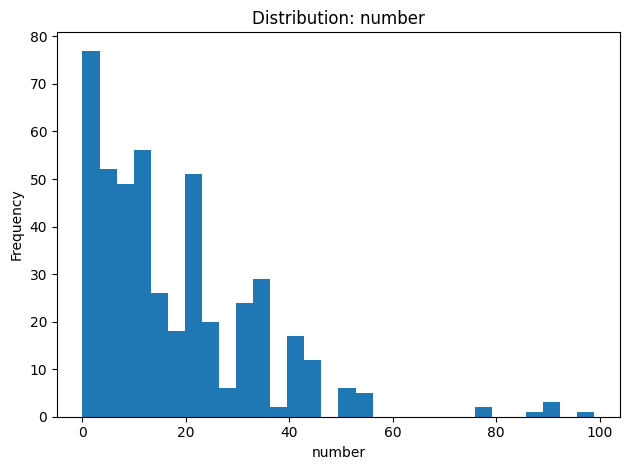

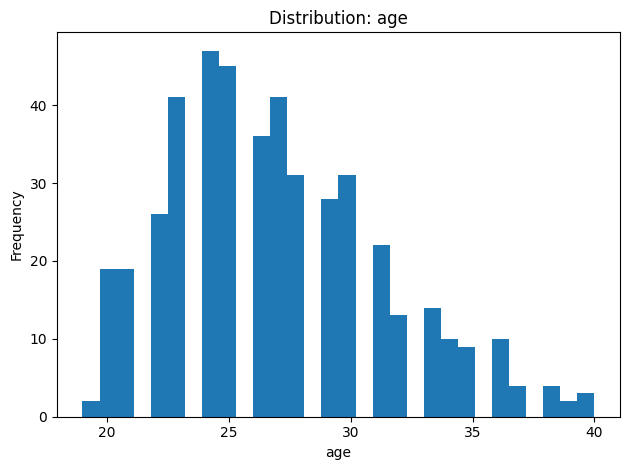

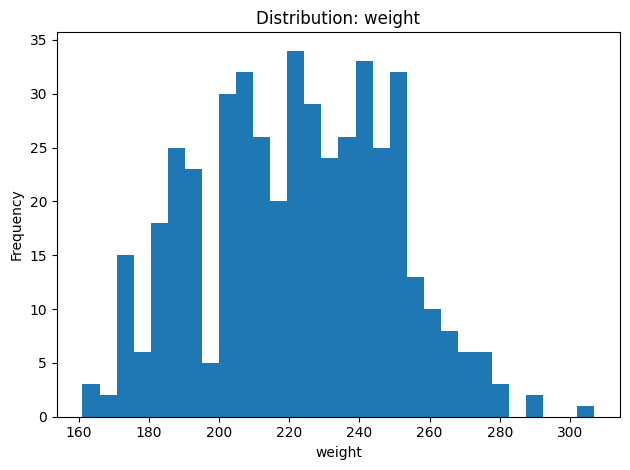

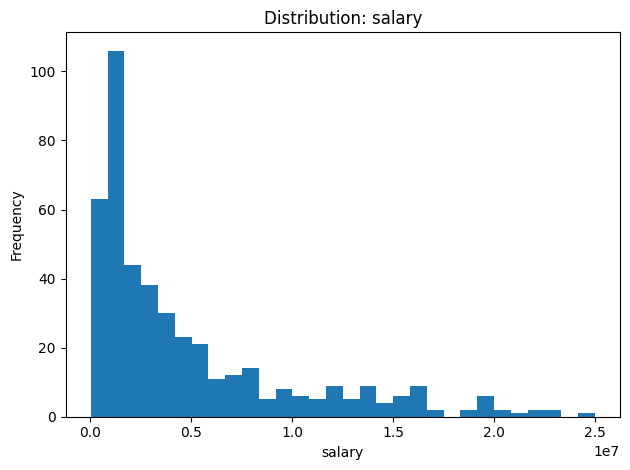

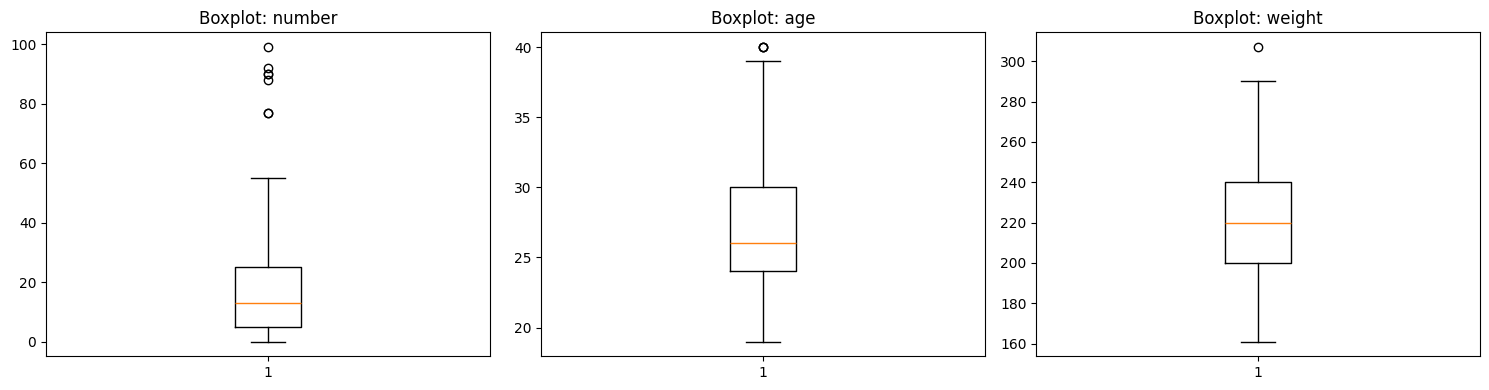

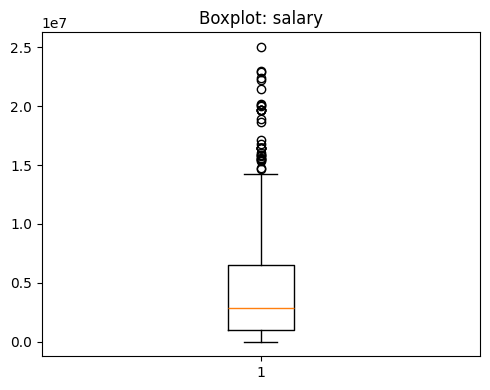

In [13]:
# ------------------------------
# 8) Numeric column distributions & outliers
# ------------------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns found:", num_cols)

# For quick visual check — histogram for each numeric column
for col in num_cols:
    fig, ax = plt.subplots()
    ax.hist(df[col].dropna(), bins=30)
    ax.set_title(f"Distribution: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Boxplots for numeric columns (grouped in rows of 3 to avoid long plots)
def plot_boxcols(columns, cols_per_row=3):
    n = len(columns)
    for i in range(0, n, cols_per_row):
        subset = columns[i:i+cols_per_row]
        fig, axes = plt.subplots(1, len(subset), figsize=(5*len(subset), 4))
        if len(subset) == 1:
            axes = [axes]
        for ax, c in zip(axes, subset):
            ax.boxplot(df[c].dropna())
            ax.set_title(f"Boxplot: {c}")
        plt.tight_layout()
        plt.show()

if num_cols:
    plot_boxcols(num_cols, cols_per_row=3)


--- Correlation matrix ---


,number,age,weight,salary
number,1.000,0.029,0.207,-0.112
age,0.029,1.000,0.087,0.213
weight,0.207,0.087,1.000,0.138
salary,-0.112,0.213,0.138,1.000


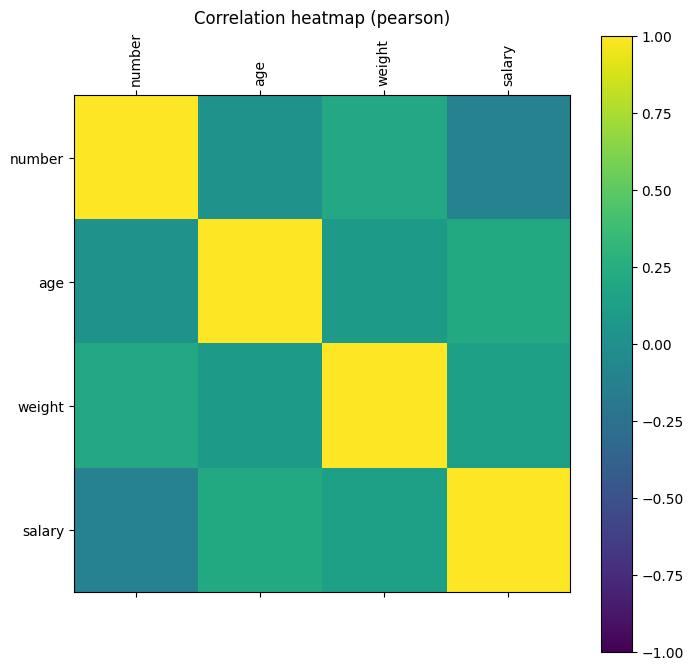

In [14]:
# ------------------------------
# 9) Correlation matrix (numeric)
# ------------------------------
if len(num_cols) >= 2:
    corr = df[num_cols].corr(method='pearson')
    print("\n--- Correlation matrix ---")
    display(corr.round(3))

    # Plot heatmap using matplotlib
    fig, ax = plt.subplots(figsize=(len(num_cols)*0.5 + 6, len(num_cols)*0.5 + 6))
    cax = ax.matshow(corr, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ax.set_xticks(range(len(num_cols)))
    ax.set_yticks(range(len(num_cols)))
    ax.set_xticklabels(num_cols, rotation=90)
    ax.set_yticklabels(num_cols)
    ax.set_title("Correlation heatmap (pearson)")
    plt.show()
else:
    print("Not enough numeric columns to compute correlation matrix.")

In [15]:
# ------------------------------
# 10) Common EDA analyses for NBA-like datasets
# Adjust these based on your actual column names (e.g., team, position, pts, ast, reb)
# ------------------------------
# We'll try to detect common column names and run some grouped summaries.
possible_team_cols = [c for c in df.columns if 'team' in c]
possible_pos_cols = [c for c in df.columns if c in ['position', 'pos'] or 'pos' in c]
possible_points_cols = [c for c in df.columns if c in ['points', 'pts', 'pt', 'p']]

print("\nDetected likely team columns:", possible_team_cols)
print("Detected likely position columns:", possible_pos_cols)
print("Detected likely points columns:", possible_points_cols)

# If a team column exists do groupby aggregation
if possible_team_cols and num_cols:
    team_col = possible_team_cols[0]
    # choose numeric columns to aggregate
    agg_cols = num_cols[:6]  # first few numeric columns for demonstration
    print(f"\nAggregations by team (sample columns: {agg_cols}):")
    team_summary = df.groupby(team_col)[agg_cols].mean().sort_values(by=agg_cols[0], ascending=False)
    display(team_summary.head(10))

# If a position column exists, compare average stats by position
if possible_pos_cols and num_cols:
    pos_col = possible_pos_cols[0]
    pos_summary = df.groupby(pos_col)[num_cols].median().sort_values(by=num_cols[0], ascending=False)
    print(f"\nMedian numeric stats by position ({pos_col}):")
    display(pos_summary)

# Top scorers (if points column exists)
if possible_points_cols:
    pts_col = possible_points_cols[0]
    print(f"\nTop 10 by {pts_col}:")
    display(df.sort_values(by=pts_col, ascending=False)[['player' if 'player' in df.columns else df.columns[0], pts_col]].head(10))


Detected likely team columns: ['team']
Detected likely position columns: ['position']
Detected likely points columns: []

Aggregations by team (sample columns: ['number', 'age', 'weight', 'salary']):


,number,age,weight,salary
team,,,,
Boston Celtics,31.866667,24.733333,219.466667,4.181505e+06
Toronto Raptors,22.466667,26.133333,221.800000,4.741174e+06
Golden State Warriors,20.866667,27.666667,224.600000,5.924600e+06
Dallas Mavericks,20.000000,29.733333,227.000000,4.746582e+06
Milwaukee Bucks,20.000000,24.562500,224.062500,4.350220e+06
Minnesota Timberwolves,19.571429,26.357143,228.642857,4.593054e+06
Los Angeles Clippers,19.533333,29.466667,219.733333,6.323643e+06
Chicago Bulls,19.200000,27.400000,218.933333,5.785559e+06
Atlanta Hawks,19.000000,28.200000,221.266667,4.860197e+06



Median numeric stats by position (position):


,number,age,weight,salary
position,,,,
PF,21.5,27.0,240.0,2943221.0
C,17.0,27.0,250.0,3811060.0
SF,15.0,26.0,225.0,2020540.0
SG,11.0,25.0,209.5,2127840.0
PG,8.0,26.5,190.0,3018463.5


In [16]:
# ------------------------------
# 11) Outlier detection using IQR method for each numeric column
# ------------------------------
def detect_outliers_iqr(series, multiplier=1.5):
    """Return boolean mask of outliers in a numeric series using IQR method."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - multiplier * iqr
    upper = q3 + multiplier * iqr
    return (series < lower) | (series > upper)

outlier_summary = {}
for col in num_cols:
    mask = detect_outliers_iqr(df[col].dropna())
    outlier_count = mask.sum()
    outlier_summary[col] = outlier_count

# Present outlier counts sorted
outlier_df = pd.Series(outlier_summary).sort_values(ascending=False).to_frame('outlier_count')
print("\nOutlier counts per numeric column (IQR method):")
display(outlier_df)


Outlier counts per numeric column (IQR method):


,outlier_count
salary,35
number,7
age,3
weight,1


In [17]:
# ------------------------------
# 12) Missing value handling (simple strategies)
# ------------------------------
# Example approaches — choose based on column importance and data meaning
# - Drop columns with > 70% missing
# - Drop rows with target missing
# - Fill small missing numeric values with median
# - Fill categorical missing with 'Unknown'

# 1) Drop columns with too many missing values
threshold = 0.7  # drop if more than 70% missing
cols_to_drop = missing_df[missing_df['missing_percent'] > threshold * 100].index.tolist()
print("\nColumns to drop (>{}% missing):".format(int(threshold*100)), cols_to_drop)
df_clean = df.drop(columns=cols_to_drop).copy()

# 2) For numeric columns with few missing values, fill with median
num_cols_clean = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols_clean:
    n_missing = df_clean[col].isnull().sum()
    if 0 < n_missing <= (0.05 * len(df_clean)):  # if <=5% missing
        median = df_clean[col].median()
        df_clean[col].fillna(median, inplace=True)
        print(f"Filled {n_missing} missing values in '{col}' with median = {median}")

# 3) For categorical columns with small missing, fill with 'Unknown'
cat_cols_clean = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols_clean:
    n_missing = df_clean[col].isnull().sum()
    if n_missing > 0 and n_missing <= (0.05 * len(df_clean)):
        df_clean[col].fillna('Unknown', inplace=True)
        print(f"Filled {n_missing} missing values in '{col}' with 'Unknown'")

# Show counts after cleaning
print("\nAfter basic cleaning: missing counts (top):")
display(df_clean.isnull().sum().sort_values(ascending=False).head(20))


Columns to drop (>70% missing): []
Filled 11 missing values in 'salary' with median = 2839073.0

After basic cleaning: missing counts (top):


/tmp/ipython-input-3520601024.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median, inplace=True)


,0
college,84
name,0
team,0
position,0
number,0
age,0
height,0
weight,0
salary,0


In [18]:
# ------------------------------
# 13) Save cleaned dataset (optional)
# ------------------------------
clean_save_path = "nba_cleaned.csv"
df_clean.to_csv(clean_save_path, index=False)
print(f"\nSaved cleaned dataset to {clean_save_path}. You can download it from the Files pane in Colab.")

# If you mounted Drive and want to save there, uncomment and set drive path:
# df_clean.to_csv('/content/drive/MyDrive/nba_cleaned.csv', index=False)


Saved cleaned dataset to nba_cleaned.csv. You can download it from the Files pane in Colab.


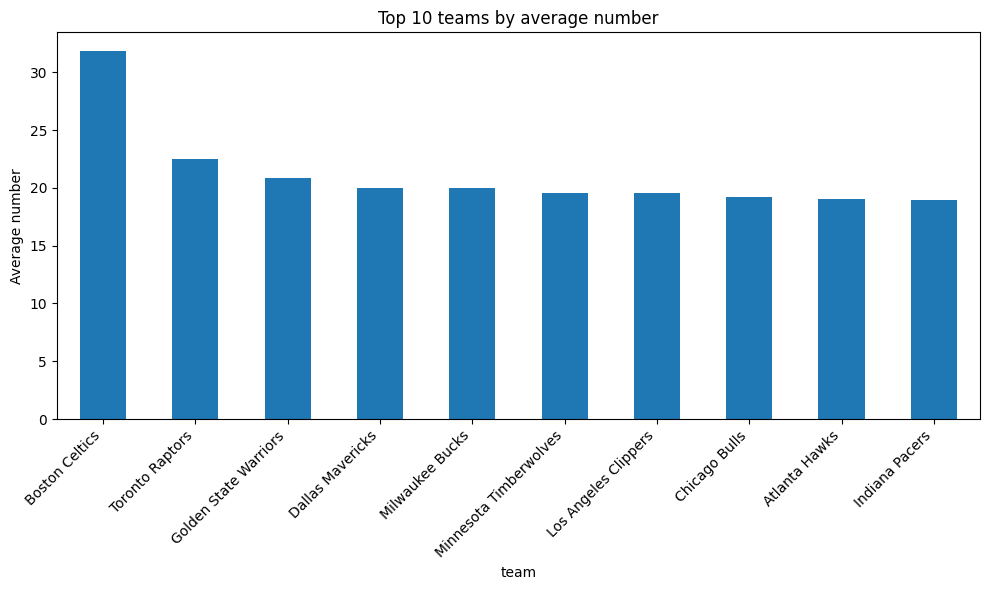

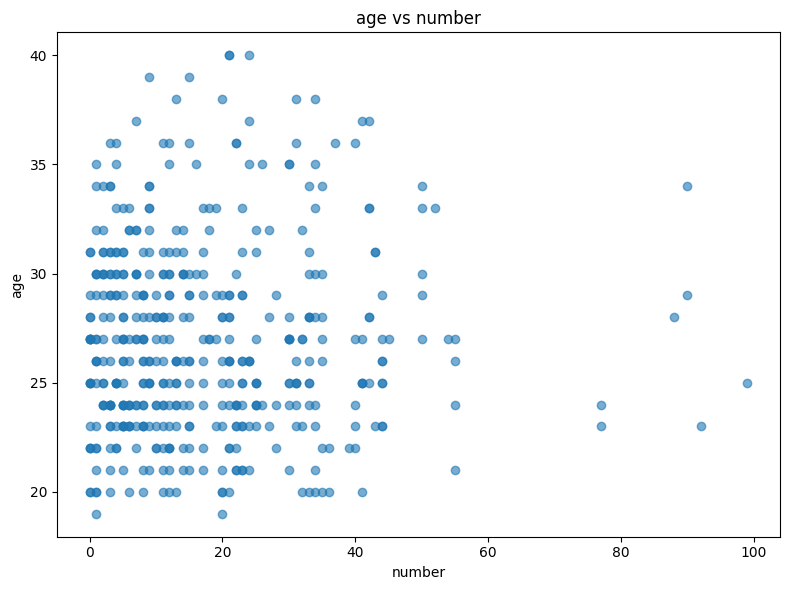

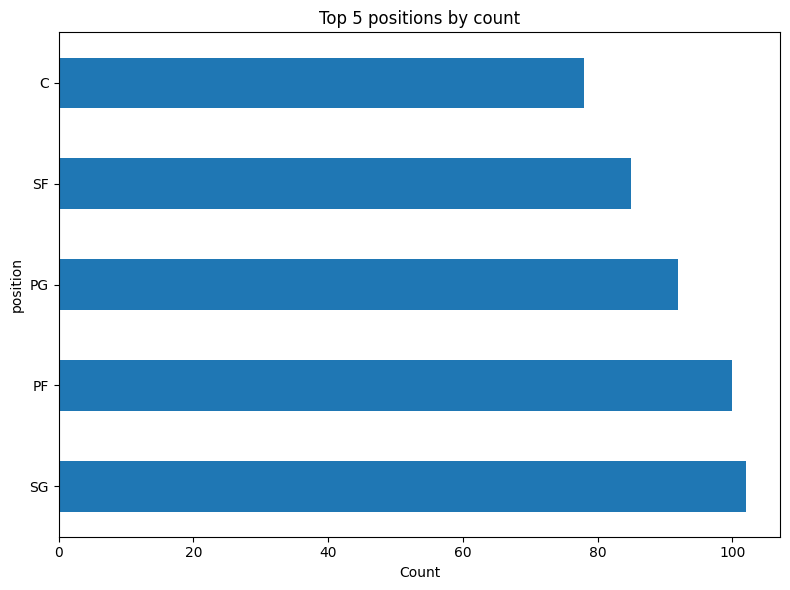

In [19]:
# ------------------------------
# 14) Example visualizations (presentation-ready)
# Use matplotlib for all plots so it's Colab-friendly.
# ------------------------------
# 14a) Bar chart: top 10 teams by mean of a sample numeric column (if team present)
if possible_team_cols and num_cols:
    team_col = possible_team_cols[0]
    metric = num_cols[0]  # choose first numeric column as example
    team_mean = df_clean.groupby(team_col)[metric].mean().sort_values(ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(10,6))
    team_mean.plot(kind='bar', ax=ax)
    ax.set_title(f"Top 10 teams by average {metric}")
    ax.set_ylabel(f"Average {metric}")
    ax.set_xlabel(team_col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 14b) Scatter plot: relation between two numeric columns (if at least two numeric)
if len(num_cols) >= 2:
    x_col = num_cols[0]
    y_col = num_cols[1]
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(df_clean[x_col], df_clean[y_col], alpha=0.6)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col} vs {x_col}")
    plt.tight_layout()
    plt.show()

# 14c) Pie chart or horizontal bar for categorical distribution (if position exists)
if possible_pos_cols:
    pos_col = possible_pos_cols[0]
    pos_counts = df_clean[pos_col].value_counts().head(10)
    fig, ax = plt.subplots(figsize=(8,6))
    pos_counts.plot(kind='barh', ax=ax)
    ax.set_title(f"Top {len(pos_counts)} positions by count")
    ax.set_xlabel("Count")
    plt.tight_layout()
    plt.show()

In [21]:
# ------------------------------
# 15) Quick feature ideas
# ------------------------------
# Example: players above a threshold in a chosen metric
if possible_points_cols:
    pts_col = possible_points_cols[0]
    threshold_value = df_clean[pts_col].median() if pts_col in df_clean else None
    if threshold_value is not None:
        high_scorers = df_clean[df_clean[pts_col] > threshold_value]
        print(f"\nPlayers (rows) with {pts_col} above median ({threshold_value}): {len(high_scorers)} rows")
        display(high_scorers.head(10))

In [22]:
# ------------------------------
# 16) Save some plots to files (optional)
# ------------------------------
# Example: save the last generated figure to PNG
# plt.savefig("example_plot.png", dpi=150, bbox_inches='tight')

In [23]:
# ------------------------------
# 17) Brief report summary as text (printable)
# ------------------------------
print("\n--- EDA Summary ---")
print(f"Rows, Columns: {df.shape}")
print(f"Columns dropped due to missingness: {cols_to_drop}")
print("Top numeric columns:", num_cols[:6])
print("Top categorical columns:", cat_cols[:6])
print("A cleaned CSV 'nba_cleaned.csv' was created for future use.")


--- EDA Summary ---
Rows, Columns: (457, 9)
Columns dropped due to missingness: []
Top numeric columns: ['number', 'age', 'weight', 'salary']
Top categorical columns: ['name', 'team', 'position', 'height', 'college']
A cleaned CSV 'nba_cleaned.csv' was created for future use.


In [24]:
# ------------------------------
# 18) Next steps (recommended)
# ------------------------------
print("\n--- Suggested next steps ---")
print("- Add domain-specific columns (e.g., per-36 stats, efficiency ratings).")
print("- Use visualizations with annotations for a report (matplotlib has annotate()).")
print("- Build a small predictive model (e.g., predict points) as advanced work.")
print("- Convert the notebook into a short tutorial: add markdown explanations & screenshots.")



--- Suggested next steps ---
- Add domain-specific columns (e.g., per-36 stats, efficiency ratings).
- Use visualizations with annotations for a report (matplotlib has annotate()).
- Build a small predictive model (e.g., predict points) as advanced work.
- Convert the notebook into a short tutorial: add markdown explanations & screenshots.
